In [2]:
#Import imdb dataset from keras library which is already preprocessed into number of words
#Sequence of words are turned into sequence of integers stand for specific integer in the dictionary
from keras.datasets import imdb 
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers

Using TensorFlow backend.


In [3]:
#Load first 10000 words as test data and train data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [31]:
#.shape will give no of rows and columns in the data
print(train_data.shape)

(25000,)


In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [6]:
#Vectorizing the data 
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
#Adding layers to the deep neural network 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
'''from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])'''

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [13]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
partial_x_train.shape

(15000, 10000)

In [15]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 509us/step - loss: 0.5048 - accuracy: 0.7769 - val_loss: 0.3907 - val_accuracy: 0.8541
Epoch 2/20
15000/15000 [==============================] - 4s 240us/step - loss: 0.2978 - accuracy: 0.9045 - val_loss: 0.3067 - val_accuracy: 0.8852
Epoch 3/20
15000/15000 [==============================] - 4s 253us/step - loss: 0.2179 - accuracy: 0.9294 - val_loss: 0.2839 - val_accuracy: 0.8871
Epoch 4/20
15000/15000 [==============================] - 4s 259us/step - loss: 0.1716 - accuracy: 0.9443 - val_loss: 0.2998 - val_accuracy: 0.8794
Epoch 5/20
15000/15000 [==============================] - 4s 248us/step - loss: 0.1389 - accuracy: 0.9563 - val_loss: 0.3212 - val_accuracy: 0.8736
Epoch 6/20
15000/15000 [==============================] - 4s 271us/step - loss: 0.1154 - accuracy: 0.9649 - val_loss: 0.2977 - val_accuracy: 0.8869
Epoch 7/20
15000/15000 [==============================] - 4s 2

In [45]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

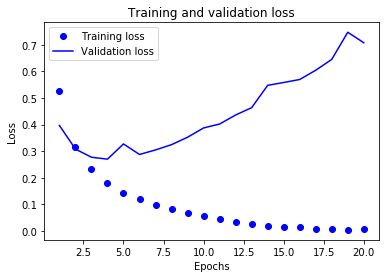

In [48]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

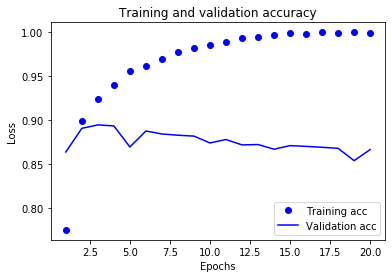

In [51]:
plt.clf()#Clear the figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
#Retrain the model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
model.predict(x_test)

Epoch 1/4
25000/25000 [==============================] - 5s 184us/step - loss: 0.4488 - accuracy: 0.82060s - loss: 0.4731 
Epoch 2/4
25000/25000 [==============================] - 4s 159us/step - loss: 0.2588 - accuracy: 0.9072
Epoch 3/4
25000/25000 [==============================] - 4s 151us/step - loss: 0.2000 - accuracy: 0.9292
Epoch 4/4
25000/25000 [==============================] - 7s 288us/step


array([[0.14771809],
       [0.9999397 ],
       [0.6584341 ],
       ...,
       [0.08652835],
       [0.05060523],
       [0.6334437 ]], dtype=float32)